In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazonreviews/test.ft.txt.bz2
/kaggle/input/amazonreviews/train.ft.txt.bz2
/kaggle/input/final-done-ree/final_dataset_boom .csv


In [2]:
df = pd.read_csv("/kaggle/input/final-done-ree/final_dataset_boom .csv")
df.head()

,Platform,Review Content,Helpful votes,Review score,Price,Quality,Service,delivery,Rating
0,daraz,"""I ordered QKZ DM10. Look what they sent... I'...",9,negative,not worth,bad,poor,slow,1
1,daraz,"""It doesn't connect properly to the mobile, an...",9,negative,not worth,bad,poor,slow,1
2,daraz,"""Very bad. 🙂🙂""",7,negative,not worth,bad,poor,slow,1
3,daraz,"""They provided a very bad quality headphone......",11,negative,not worth,bad,poor,slow,1
4,daraz,"""It is lighter than my previous headphones. It...",5,negative,not worth,average,poor,slow,1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
print(df.shape)
df.head()

(3077, 9)


,Platform,Review Content,Helpful votes,Review score,Price,Quality,Service,delivery,Rating
0,daraz,"""I ordered QKZ DM10. Look what they sent... I'...",9,negative,not worth,bad,poor,slow,1
1,daraz,"""It doesn't connect properly to the mobile, an...",9,negative,not worth,bad,poor,slow,1
2,daraz,"""Very bad. 🙂🙂""",7,negative,not worth,bad,poor,slow,1
3,daraz,"""They provided a very bad quality headphone......",11,negative,not worth,bad,poor,slow,1
4,daraz,"""It is lighter than my previous headphones. It...",5,negative,not worth,average,poor,slow,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Platform        3077 non-null   object
 1   Review Content  3077 non-null   object
 2   Helpful votes   3077 non-null   int64 
 3   Review score    3077 non-null   object
 4   Price           3077 non-null   object
 5   Quality         3077 non-null   object
 6   Service         3077 non-null   object
 7   delivery        3077 non-null   object
 8   Rating          3077 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 216.5+ KB


In [6]:
df['Review score'].value_counts()

negative    1741
positive    1336
Name: Review score, dtype: int64

In [7]:
print(df.columns)


Index(['Platform', 'Review Content', 'Helpful votes', 'Review score', 'Price',
       'Quality', 'Service', 'delivery', 'Rating'],
      dtype='object')


In [8]:
df[df['Review score']=='positive'].sample(n=1)['Review Content'].iloc[0]

'"Product is actually value for money.... Got it only in 1 day though it wasn\'t urgent... Thanks to the seller for this amazing earphone..."'

In [9]:
df[df['Review score']=='negative'].sample(n=1)['Review Content'].iloc[0]

'"It\'s not working."'

In [10]:
import warnings 
import nltk

from nltk import wsd
from spacy import load
from spacy.cli import download
from nltk.corpus import wordnet as wn

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
nlp = load('en_core_web_sm')

! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


In [11]:
import re

from urllib.parse import urlparse

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

In [13]:
df = df.rename(columns={'Review Content': 'review_content'})


In [14]:
print(df.shape)
df.head()

(3077, 9)


,Platform,review_content,Helpful votes,Review score,Price,Quality,Service,delivery,Rating
0,daraz,"""I ordered QKZ DM10. Look what they sent... I'...",9,negative,not worth,bad,poor,slow,1
1,daraz,"""It doesn't connect properly to the mobile, an...",9,negative,not worth,bad,poor,slow,1
2,daraz,"""Very bad. 🙂🙂""",7,negative,not worth,bad,poor,slow,1
3,daraz,"""They provided a very bad quality headphone......",11,negative,not worth,bad,poor,slow,1
4,daraz,"""It is lighter than my previous headphones. It...",5,negative,not worth,average,poor,slow,1


In [15]:
def data_preparation(tweet):
    try:
        #Step 1
        tweet = re.sub(r'[][)(]',' ', tweet)
        
        #Step2
        tweet = [word for word in tweet.split() if not urlparse(word).scheme]
        tweet = ' '.join(tweet)

        #Step 3
        tweet = re.sub(r"\@\w+", "", tweet)

        #Step 4
        tweet = re.sub(re.compile('<.*?>'), '', tweet)
        
        #Step 5
        tweet = re.sub('[^A-Za-z0-9]+', ' ', tweet)
        
        #Step 6
        tweet = tweet.lower()
        
        #Step 7
        tokens = nltk.word_tokenize(tweet)
        
        #Step 8
        tweet = [word for word in tokens if word not in stop_words]
        
        #Step 9
        tweet = [lemmatizer.lemmatize(word) for word in tweet]
        tweet = ' '.join(tweet)
        
        return tweet
    
    except Exception as ex:
        print('Line:', tweet, '\n\n')
        print('Exception:', ex, '\n')


df['cleared_review'] = df['review_content'].apply(lambda review_content: data_preparation(review_content))

In [16]:
df.head()

,Platform,review_content,Helpful votes,Review score,Price,Quality,Service,delivery,Rating,cleared_review
0,daraz,"""I ordered QKZ DM10. Look what they sent... I'...",9,negative,not worth,bad,poor,slow,1,ordered qkz dm10 look sent lost ability trust ...
1,daraz,"""It doesn't connect properly to the mobile, an...",9,negative,not worth,bad,poor,slow,1,connect properly mobile make buzzing sound lef...
2,daraz,"""Very bad. 🙂🙂""",7,negative,not worth,bad,poor,slow,1,bad
3,daraz,"""They provided a very bad quality headphone......",11,negative,not worth,bad,poor,slow,1,provided bad quality headphone sound keep drop...
4,daraz,"""It is lighter than my previous headphones. It...",5,negative,not worth,average,poor,slow,1,lighter previous headphone fake product even n...


In [17]:
df = df.rename(columns={'Review score': 'review_score'})

In [18]:
df.head()

,Platform,review_content,Helpful votes,review_score,Price,Quality,Service,delivery,Rating,cleared_review
0,daraz,"""I ordered QKZ DM10. Look what they sent... I'...",9,negative,not worth,bad,poor,slow,1,ordered qkz dm10 look sent lost ability trust ...
1,daraz,"""It doesn't connect properly to the mobile, an...",9,negative,not worth,bad,poor,slow,1,connect properly mobile make buzzing sound lef...
2,daraz,"""Very bad. 🙂🙂""",7,negative,not worth,bad,poor,slow,1,bad
3,daraz,"""They provided a very bad quality headphone......",11,negative,not worth,bad,poor,slow,1,provided bad quality headphone sound keep drop...
4,daraz,"""It is lighter than my previous headphones. It...",5,negative,not worth,average,poor,slow,1,lighter previous headphone fake product even n...


In [19]:
print(df.apply(lambda col: col.unique()))

Platform                        [daraz, amazon, rokomari, pickaboo]
review_content    ["I ordered QKZ DM10. Look what they sent... I...
Helpful votes        [9, 7, 11, 5, 3, 6, 8, 12, 4, 15, 2, 1, 0, 25]
review_score                                   [negative, positive]
Price                                  [not worth, value for money]
Quality                                        [bad, average, good]
Service                                       [poor, average, good]
delivery                                      [slow, average, fast]
Rating                                              [1, 2, 3, 4, 5]
cleared_review    [ordered qkz dm10 look sent lost ability trust...
dtype: object


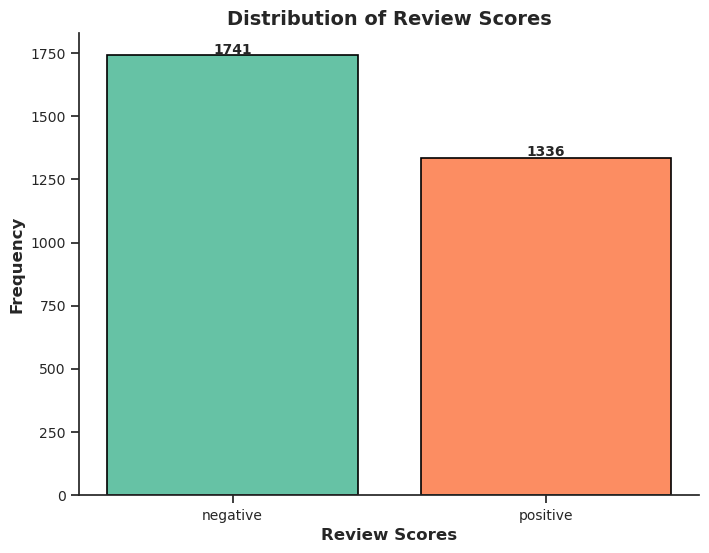

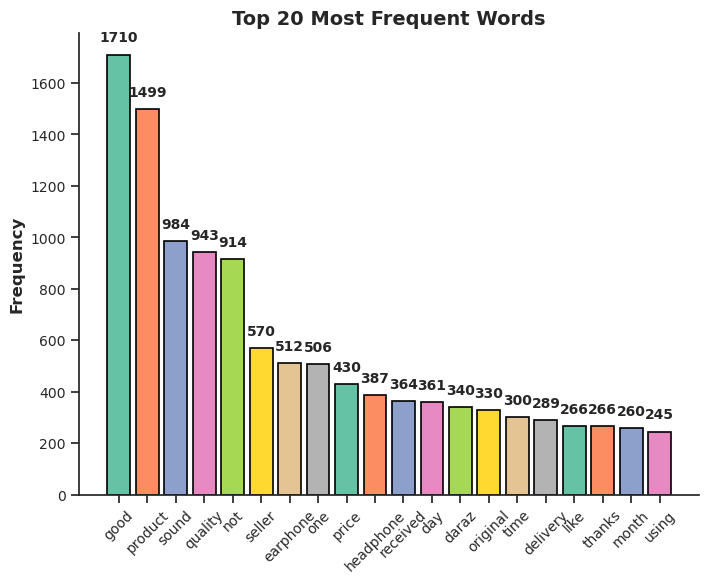

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set the seaborn style
sns.set(style='ticks')

# Set the font to DejaVu Sans
plt.rcParams['font.family'] = 'DejaVu Sans'

# Rest of your code...

# Set the seaborn style

# Calculate the count of each review score class
score_counts = df['review_score'].value_counts()

# Define colors for each bar (using a color palette)
colors = sns.color_palette('Set2')

# Create a bar chart with updated styles
plt.figure(figsize=(8, 6))
plt.bar(score_counts.index, score_counts.values, color=colors, edgecolor='black', linewidth=1.2)

# Add labels and title with updated styles
plt.xlabel('Review Scores', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Review Scores', fontsize=14, fontweight='bold')

# Add text on top of each bar with updated style
for i, count in enumerate(score_counts.values):
    plt.text(score_counts.index[i], count + 5, str(count), ha='center', fontsize=10, fontweight='bold')

# Customize the spines
sns.despine()

# Customize the tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()

# Calculate the total document count
total_documents = len(df)

# Calculate the total word count
total_words = df['cleared_review'].apply(lambda x: len(x.split())).sum()

# Calculate the unique word count
word_counts = Counter(df['cleared_review'].str.split().sum())

# Get the top 20 most frequent words and their counts
top_words = word_counts.most_common(20)
labels, counts = zip(*top_words)

# Create a bar chart for counts with updated styles
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors, edgecolor='black', linewidth=1.2)

# Add labels and title with updated styles
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 20 Most Frequent Words', fontsize=14, fontweight='bold')

# Add text on top of each bar with updated style
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=10, fontweight='bold')

# Customize the spines
sns.despine()

# Customize the tick parameters
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


In [21]:
df['review_score'].mask(df['review_score'] == "positive", 1, inplace=True)
df['review_score'].mask(df['review_score'] == "negative", 0, inplace=True)
df.head()

,Platform,review_content,Helpful votes,review_score,Price,Quality,Service,delivery,Rating,cleared_review
0,daraz,"""I ordered QKZ DM10. Look what they sent... I'...",9,0,not worth,bad,poor,slow,1,ordered qkz dm10 look sent lost ability trust ...
1,daraz,"""It doesn't connect properly to the mobile, an...",9,0,not worth,bad,poor,slow,1,connect properly mobile make buzzing sound lef...
2,daraz,"""Very bad. 🙂🙂""",7,0,not worth,bad,poor,slow,1,bad
3,daraz,"""They provided a very bad quality headphone......",11,0,not worth,bad,poor,slow,1,provided bad quality headphone sound keep drop...
4,daraz,"""It is lighter than my previous headphones. It...",5,0,not worth,average,poor,slow,1,lighter previous headphone fake product even n...


In [22]:
from sklearn.model_selection import train_test_split

data = df.copy()
data = data[data['review_score'] != 'neutral']
data['review_score'] = data['review_score'].astype(int)

y = data['review_score'].values

data.drop(['review_score'], axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print('Train data: ', X_train.shape, y_train.shape)
print('Test data: ', X_test.shape, y_test.shape)

Train data:  (2153, 9) (2153,)
Test data:  (924, 9) (924,)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=10)

X_train_review_bow = vect.fit_transform(X_train['cleared_review'])
X_test_review_bow = vect.transform(X_test['cleared_review'])

print('X_train_review_bow: ', X_train_review_bow.shape)
print('X_test_teview_bow: ', X_test_review_bow.shape)

X_train_review_bow:  (2153, 415)
X_test_teview_bow:  (924, 415)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['cleared_review'])
X_test_review_tfidf = vectorizer.transform(X_test['cleared_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (2153, 415)
X_test_review_tfidf shape:  (924, 415)


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8906926406926406


In [26]:
clf = MultinomialNB(alpha=1)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)

print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8961038961038961


In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', max_iter=500)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.9296536796536796


In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', max_iter=500)
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.9426406926406926


In [29]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))


Test Accuracy:  0.9426406926406926


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Using Bag-of-Words features
clf = LogisticRegression()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow)
print('Test Accuracy (Bag-of-Words):', accuracy_score(y_test, y_pred))

# Using TF-IDF features
clf = LogisticRegression(C=1.0)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy (TF-IDF):', accuracy_score(y_test, y_pred))


Test Accuracy (Bag-of-Words): 0.9426406926406926
Test Accuracy (TF-IDF): 0.9296536796536796


In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Using Bag-of-Words features
clf = SVC()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow)
print('Test Accuracy (Bag-of-Words):', accuracy_score(y_test, y_pred))

# Using TF-IDF features
clf = SVC(C=1.0)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy (TF-IDF):', accuracy_score(y_test, y_pred))


Test Accuracy (Bag-of-Words): 0.961038961038961
Test Accuracy (TF-IDF): 0.974025974025974


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Using Bag-of-Words features
clf = RandomForestClassifier()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow)
print('Test Accuracy (Bag-of-Words):', accuracy_score(y_test, y_pred))

# Using TF-IDF features
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy (TF-IDF):', accuracy_score(y_test, y_pred))


Test Accuracy (Bag-of-Words): 0.9826839826839827
Test Accuracy (TF-IDF): 0.9761904761904762


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Using Bag-of-Words features
clf = KNeighborsClassifier()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow)
print('Test Accuracy (Bag-of-Words):', accuracy_score(y_test, y_pred))

# Using TF-IDF features
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy (TF-IDF):', accuracy_score(y_test, y_pred))


Test Accuracy (Bag-of-Words): 0.908008658008658
Test Accuracy (TF-IDF): 0.8192640692640693


Classification Report - Logistic Regression (Bag-of-Words):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       523
           1       0.95      0.91      0.93       401

    accuracy                           0.94       924
   macro avg       0.94      0.94      0.94       924
weighted avg       0.94      0.94      0.94       924

Classification Report - Logistic Regression (TF-IDF):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       523
           1       0.95      0.89      0.92       401

    accuracy                           0.93       924
   macro avg       0.93      0.92      0.93       924
weighted avg       0.93      0.93      0.93       924

Classification Report - SVC (Bag-of-Words):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       523
           1       0.96      0.95      0.95       401

    accuracy            

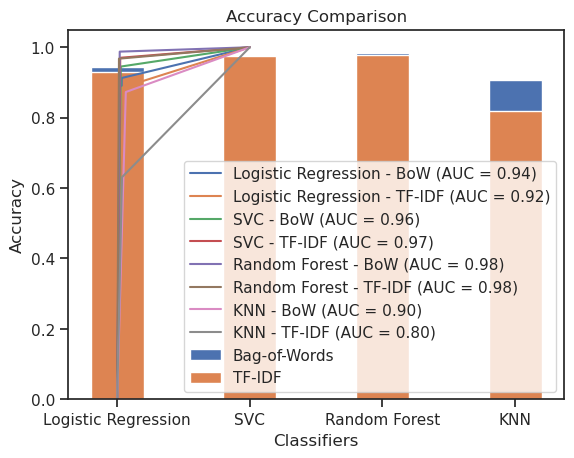

In [34]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Define classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('SVC', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier())
]

# Lists to store accuracy scores
accuracy_bow = []
accuracy_tfidf = []

# Train and test classifiers
for name, clf in classifiers:
    # Using Bag-of-Words features
    clf.fit(X_train_review_bow, y_train)
    y_pred_bow = clf.predict(X_test_review_bow)
    accuracy_bow.append(accuracy_score(y_test, y_pred_bow))
    print(f'Classification Report - {name} (Bag-of-Words):')
    print(classification_report(y_test, y_pred_bow))

    # Using TF-IDF features
    clf.fit(X_train_review_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_review_tfidf)
    accuracy_tfidf.append(accuracy_score(y_test, y_pred_tfidf))
    print(f'Classification Report - {name} (TF-IDF):')
    print(classification_report(y_test, y_pred_tfidf))

    # ROC curve for Bag-of-Words
    fpr_bow, tpr_bow, thresholds_bow = roc_curve(y_test, y_pred_bow)
    auc_bow = roc_auc_score(y_test, y_pred_bow)

    # ROC curve for TF-IDF
    fpr_tfidf, tpr_tfidf, thresholds_tfidf = roc_curve(y_test, y_pred_tfidf)
    auc_tfidf = roc_auc_score(y_test, y_pred_tfidf)

    # Plot ROC curves
    plt.plot(fpr_bow, tpr_bow, label=f'{name} - BoW (AUC = {auc_bow:.2f})')
    plt.plot(fpr_tfidf, tpr_tfidf, label=f'{name} - TF-IDF (AUC = {auc_tfidf:.2f})')

# Plot accuracy comparison
labels = ['Logistic Regression', 'SVC', 'Random Forest', 'KNN']
x = range(len(labels))
plt.bar(x, accuracy_bow, width=0.4, label='Bag-of-Words')
plt.bar(x, accuracy_tfidf, width=0.4, label='TF-IDF')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()


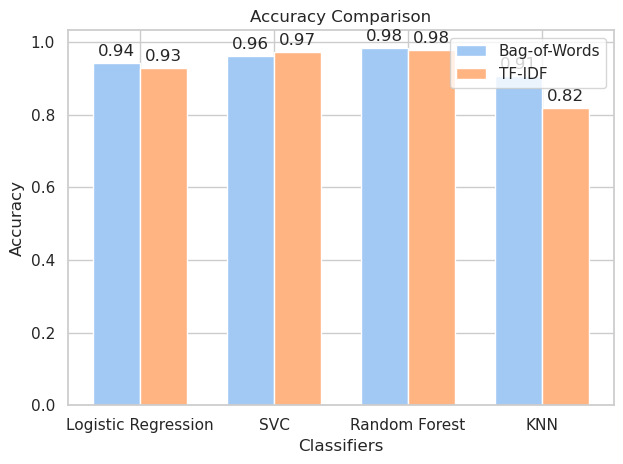

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set Seaborn style
sns.set(style="whitegrid")

# Define color palette
colors = sns.color_palette("pastel")

# Define classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('SVC', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier())
]

# Lists to store accuracy scores
accuracy_bow = []
accuracy_tfidf = []

# Train and test classifiers
for name, clf in classifiers:
    # Using Bag-of-Words features
    clf.fit(X_train_review_bow, y_train)
    y_pred_bow = clf.predict(X_test_review_bow)
    accuracy_bow.append(accuracy_score(y_test, y_pred_bow))

    # Using TF-IDF features
    clf.fit(X_train_review_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_review_tfidf)
    accuracy_tfidf.append(accuracy_score(y_test, y_pred_tfidf))

# Plot accuracy comparison
labels = [name for name, _ in classifiers]
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, accuracy_bow, width, label='Bag-of-Words', color=colors[0])
rects2 = ax.bar([i + width for i in x], accuracy_tfidf, width, label='TF-IDF', color=colors[1])

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


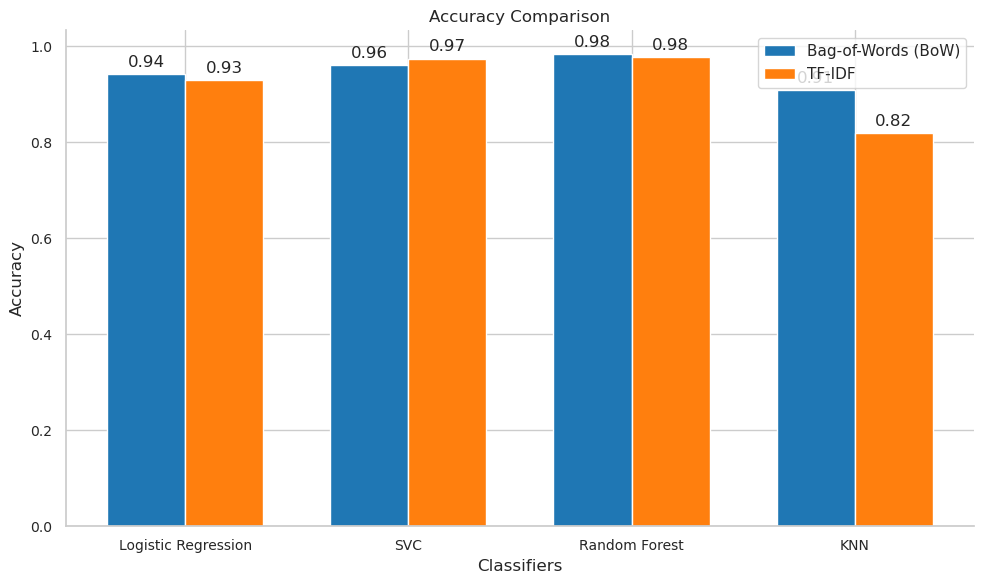

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set Seaborn style and color palette
sns.set(style='whitegrid', palette='Set2')

# Define classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('SVC', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier())
]

# Lists to store accuracy scores
accuracy_bow = []
accuracy_tfidf = []

# Train and test classifiers
for name, clf in classifiers:
    # Using Bag-of-Words features
    clf.fit(X_train_review_bow, y_train)
    y_pred_bow = clf.predict(X_test_review_bow)
    accuracy_bow.append(accuracy_score(y_test, y_pred_bow))

    # Using TF-IDF features
    clf.fit(X_train_review_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_review_tfidf)
    accuracy_tfidf.append(accuracy_score(y_test, y_pred_tfidf))

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot accuracy comparison with updated style and color
labels = [name for name, _ in classifiers]
x = range(len(labels))
width = 0.35

rects1 = ax.bar(x, accuracy_bow, width, label='Bag-of-Words (BoW)', color='tab:blue')
rects2 = ax.bar([i + width for i in x], accuracy_tfidf, width, label='TF-IDF', color='tab:orange')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')

# Set the x-axis ticks and labels
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Customize the spines and tick parameters
sns.despine()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.legend()
plt.show()


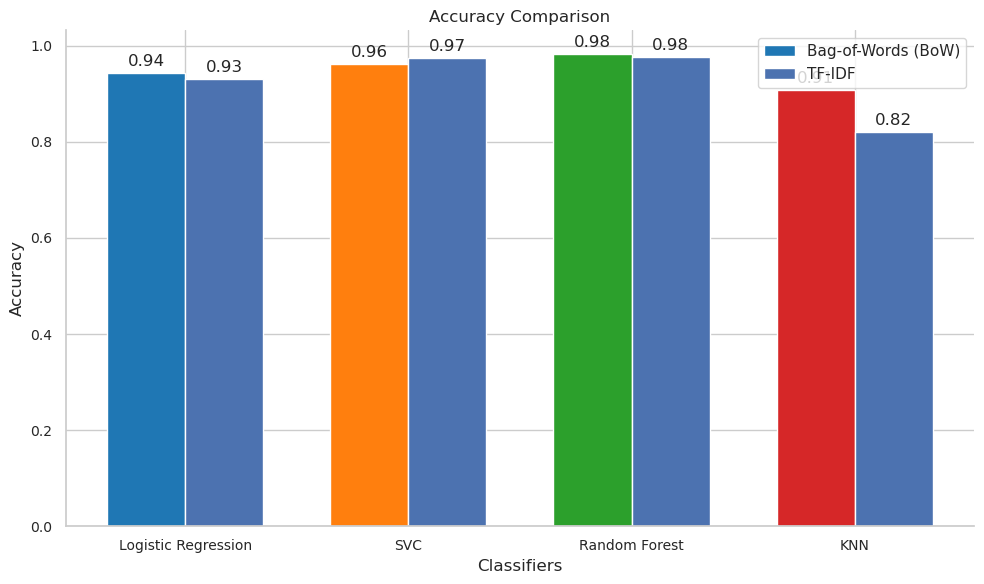

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set Seaborn style and color palette
sns.set(style='whitegrid')

# Define classifiers and colors
classifiers = [
    ('Logistic Regression', LogisticRegression(), 'tab:blue'),
    ('SVC', SVC(), 'tab:orange'),
    ('Random Forest', RandomForestClassifier(), 'tab:green'),
    ('KNN', KNeighborsClassifier(), 'tab:red')
]

# Lists to store accuracy scores
accuracy_bow = []
accuracy_tfidf = []

# Train and test classifiers
for name, clf, color in classifiers:
    # Using Bag-of-Words features
    clf.fit(X_train_review_bow, y_train)
    y_pred_bow = clf.predict(X_test_review_bow)
    accuracy_bow.append(accuracy_score(y_test, y_pred_bow))

    # Using TF-IDF features
    clf.fit(X_train_review_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_review_tfidf)
    accuracy_tfidf.append(accuracy_score(y_test, y_pred_tfidf))

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot accuracy comparison with updated style and color
labels = [name for name, _, _ in classifiers]
x = range(len(labels))
width = 0.35

rects1 = ax.bar(x, accuracy_bow, width, label='Bag-of-Words (BoW)', color=[color for _, _, color in classifiers])
rects2 = ax.bar([i + width for i in x], accuracy_tfidf, width, label='TF-IDF')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')

# Set the x-axis ticks and labels
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Customize the spines and tick parameters
sns.despine()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.legend()
plt.show()
